# Prediksi Kelulusan Mahasiswa

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# === 1. Load dan siapkan data ===
df = pd.read_csv("student-mat.csv", sep=";")

# Tambahkan label kelulusan: Lulus jika G3 >= 10
df["kelulusan"] = df["G3"].apply(lambda x: "Lulus" if x >= 10 else "Tidak Lulus")

In [3]:
print("\nStatistik deskriptif:")
print(df.describe())


Statistik deskriptif:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std 

In [4]:
print("\nDistribusi kelulusan:")
print(df["kelulusan"].value_counts())


Distribusi kelulusan:
kelulusan
Lulus          265
Tidak Lulus    130
Name: count, dtype: int64


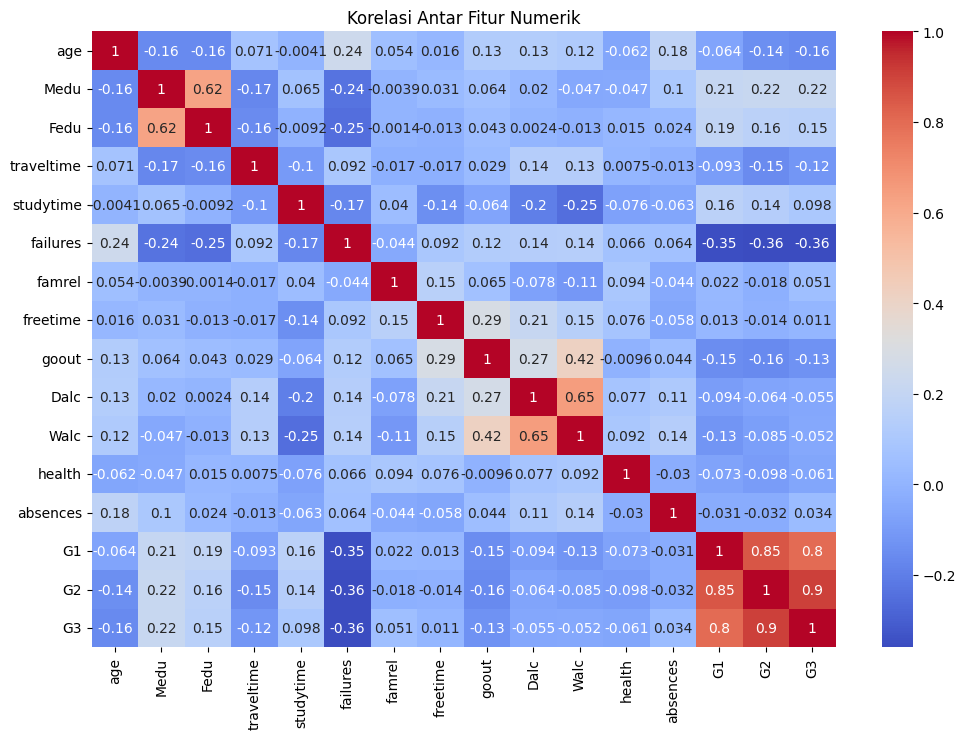

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Korelasi Antar Fitur Numerik")
plt.show()

In [6]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded.drop(["G3", "kelulusan"], axis=1)
y = df_encoded["kelulusan"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [8]:
# === 5. Evaluasi model ===
y_pred = model.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[47  5]
 [ 4 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        52
           1       0.82      0.85      0.84        27

    accuracy                           0.89        79
   macro avg       0.87      0.88      0.87        79
weighted avg       0.89      0.89      0.89        79


Accuracy: 0.8860759493670886


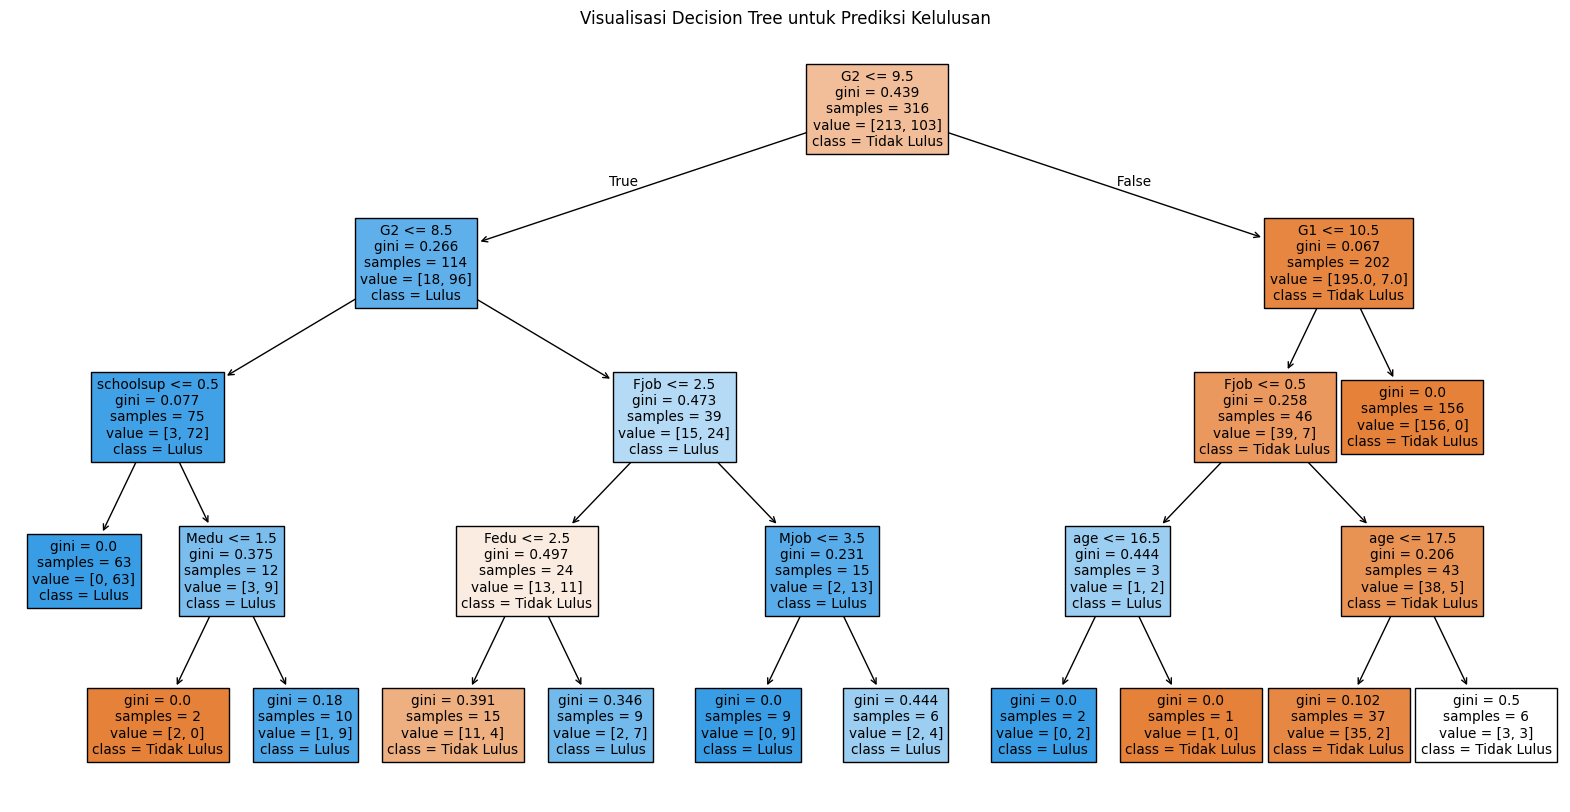

In [9]:
# === 6. Visualisasi pohon keputusan ===
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=["Tidak Lulus", "Lulus"], filled=True)
plt.title("Visualisasi Decision Tree untuk Prediksi Kelulusan")
plt.show()